# 1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [70]:
titanic_data = pd.read_csv(r'C:\Users\abdel\Desktop\titanic_dataset.csv')

# Commented columns will be included in the model
titanic_data = titanic_data.drop(['PassengerId', 
                                  #'Survived', 
                                  #'Pclass', 
                                  'Name', 
                                  #'Sex', 
                                  #'Age', 
                                  #'SibSp', 
                                  #'Parch', 
                                  'Ticket', 
                                  #'Fare', # Negative impact on the accuracy was noticed
                                  'Cabin', 
                                  #'Embarked'
                                 ], axis=1)

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)
y_pred=decision_tree_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7541899441340782


# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

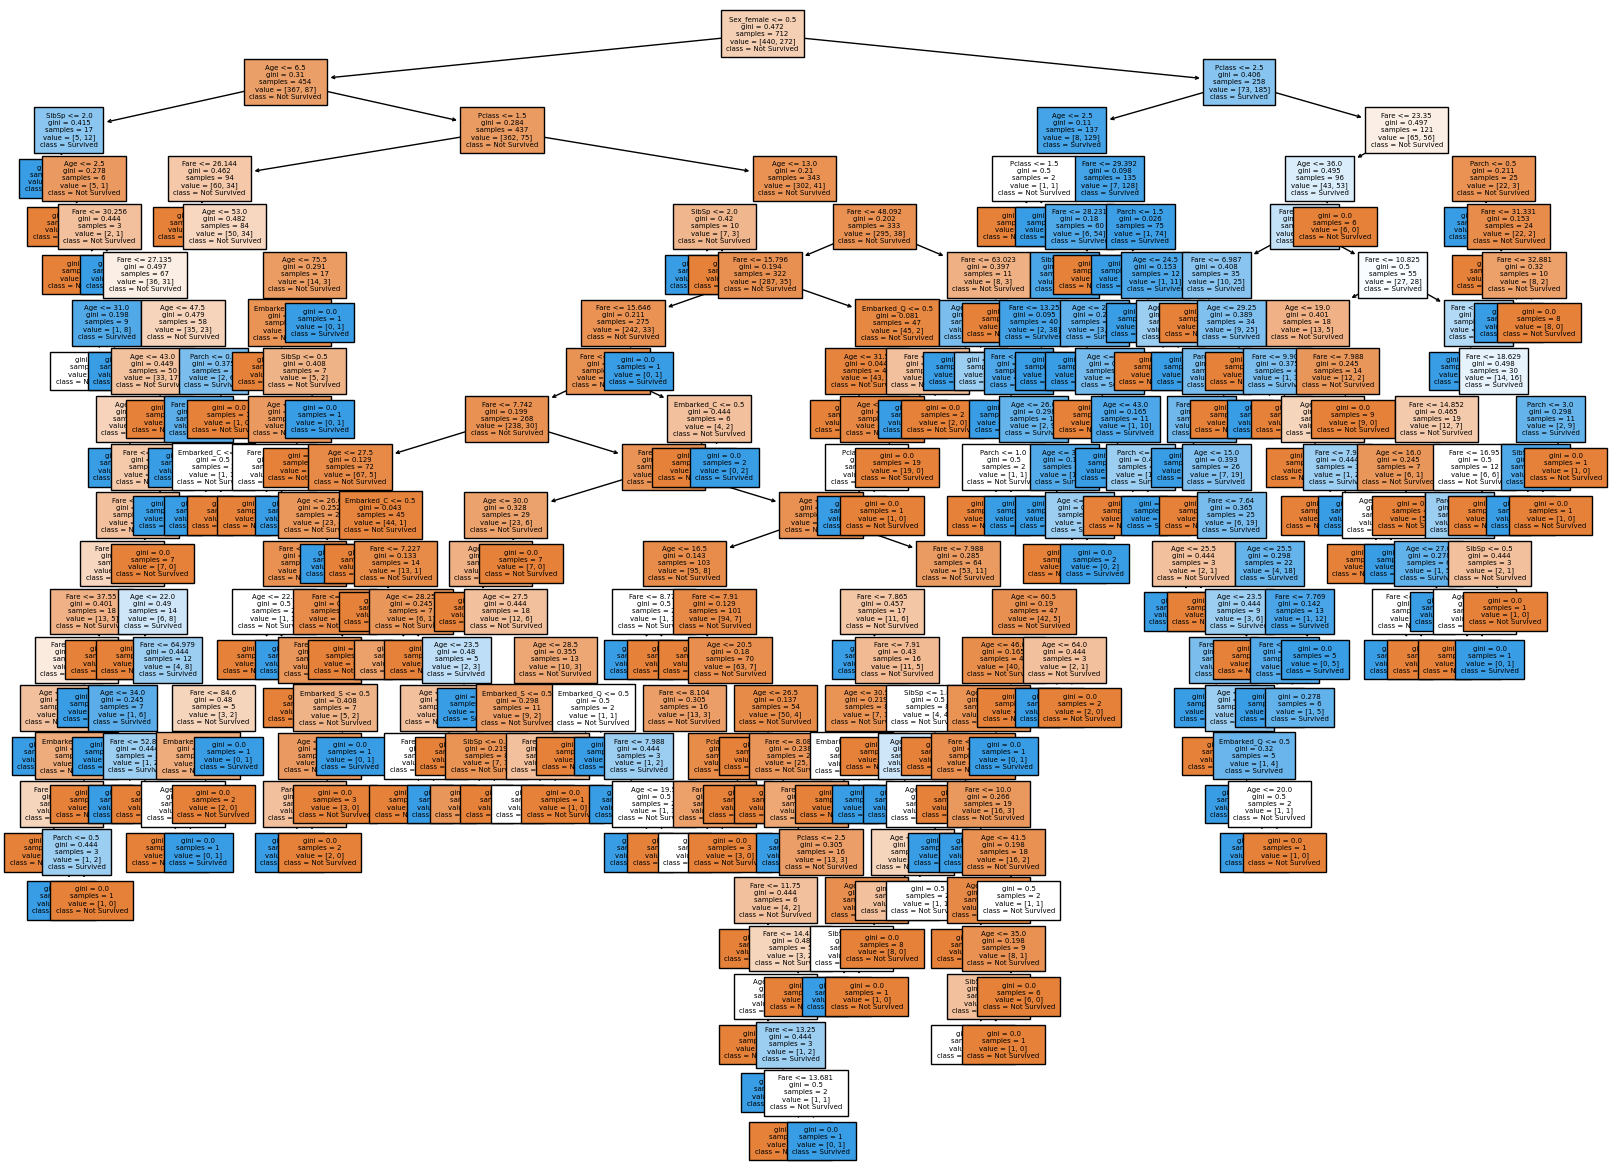

In [45]:
feature_names = list(X.columns)

plt.figure(figsize=(20, 15))
plot_tree(
    decision_tree_model,
    filled=True,
    feature_names=feature_names,
    class_names=['Not Survived', 'Survived'],
    fontsize=5
)

plt.savefig(r'C:\Users\abdel\Desktop\decision_tree_plot.svg', format='svg')

plt.show()

# 3. Change the decision tree parameters (at least two parameters). 

In [71]:
new_decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

new_decision_tree_model.fit(X_train, y_train)
y_pred=new_decision_tree_model.predict(X_test)

# 4. Calculate the new accuracy and compare it with the previous results. 

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8156424581005587


By using a max_depth=5 and min_samples_split=10 we got a different accuracy score that is higher than the previous score

# 5. Use a random forest then change the number of estimators.

In [48]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.84


In [75]:
random_forest_model = RandomForestClassifier(n_estimators=1500, max_depth=5)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

# 6. Calculate the new accuracy and compare it with the previous result.

In [77]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.87


By using a higher number of stimators and a lower max_depth the accuracy score went from 0.80 to 0.84 wich is a significant improvement in terms of performance. NB: A significant increase of processing time was also noticed.